In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)

data = pd.read_csv('bookings-with-transient-status.csv')

In [204]:
date_index = pd.DatetimeIndex(data['Booked'])
data = data.set_index(date_index)

In [205]:
last_date = pd.to_datetime(data[data.transient].iloc[-1].Booked)

In [208]:
data_before_cutoff = data[data.index < last_date]

In [210]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import datetime

cal = calendar()
holidays = cal.holidays(start=data_before_cutoff.index.min(), end=data_before_cutoff.index.max() + datetime.timedelta(days=365), return_name=True)

In [211]:
df_holidays = pd.DataFrame({
    'ds': holidays.index,
    'holiday': holidays.values,
    'lower_window': -1,
    'upper_window': 0
})

In [212]:
data_before_cutoff['Arresting Agency'].value_counts()

BOULDER COUNTY SHERIFFS OFFICE    66435
BOULDER PD                        46587
LONGMONT PD                       25262
JAIL MITTS ONLY                    8232
LAFAYETTE PD                       7300
UNIVERSITY OF COLORADO             4443
COLORADO STATE PATROL              3158
LOUISVILLE PD                      2964
PAROLE                             1001
ERIE PD                             723
NEDERLAND MARSHALS OFFICE           609
BOULDER COUNTY DRUG TASK FORCE      276
OTHER                               127
STATE DIVISION OF WILDLIFE           27
DISTRICT ATTORNEYS OFFICE            27
COMMUNITY CORRECTIONS                12
WARD MARSHALS OFFICE                  8
Name: Arresting Agency, dtype: int64

In [183]:
dix = pd.DatetimeIndex(date_index.date).drop_duplicates()

In [167]:
import numpy as np
from fbprophet import Prophet

data_unhoused = data_before_cutoff[data_before_cutoff.transient]
data_housed = data_before_cutoff[~data_before_cutoff.transient]

df_housed=pd.DataFrame(data_housed.groupby(data_housed.index.date).count()['Booked']).reset_index()
df_unhoused=pd.DataFrame(data_unhoused.groupby(data_unhoused.index.date).count()['Booked']).reset_index()

df_housed.columns=['ds','y']
df_unhoused.columns=['ds','y']

In [230]:
data_unhoused_bpd = data_unhoused[data_unhoused['Arresting Agency'] == 'BOULDER PD']
data_housed_bpd = data_housed[data_housed['Arresting Agency'] == 'BOULDER PD']

df_housed_bpd=pd.DataFrame(data_housed_bpd.groupby(data_housed_bpd.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})
df_unhoused_bpd=pd.DataFrame(data_unhoused_bpd.groupby(data_unhoused_bpd.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})

df_housed_bpd = df_housed_bpd.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})
df_unhoused_bpd = df_unhoused_bpd.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})

In [242]:
data_unhoused_bcso = data_unhoused[data_unhoused['Arresting Agency'] == 'BOULDER COUNTY SHERIFFS OFFICE']
data_housed_bcso = data_housed[data_housed['Arresting Agency'] == 'BOULDER COUNTY SHERIFFS OFFICE']

df_housed_bcso=pd.DataFrame(data_housed_bcso.groupby(data_housed_bcso.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})
df_unhoused_bcso=pd.DataFrame(data_unhoused_bcso.groupby(data_unhoused_bcso.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})

df_housed_bcso = df_housed_bcso.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})
df_unhoused_bcso = df_unhoused_bcso.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})

In [245]:
data_unhoused_cupd = data_unhoused[data_unhoused['Arresting Agency'] == 'UNIVERSITY OF COLORADO']
data_housed_cupd = data_housed[data_housed['Arresting Agency'] == 'UNIVERSITY OF COLORADO']

df_housed_cupd=pd.DataFrame(data_housed_cupd.groupby(data_housed_cupd.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})
df_unhoused_cupd=pd.DataFrame(data_unhoused_cupd.groupby(data_unhoused_cupd.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})

df_housed_cupd = df_housed_cupd.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})
df_unhoused_cupd = df_unhoused_cupd.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})

In [246]:
data_unhoused_longmont = data_unhoused[data_unhoused['Arresting Agency'] == 'LONGMONT PD']
data_housed_longmont = data_housed[data_housed['Arresting Agency'] == 'LONGMONT PD']

df_housed_longmont=pd.DataFrame(data_housed_longmont.groupby(data_housed_longmont.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})
df_unhoused_longmont=pd.DataFrame(data_unhoused_longmont.groupby(data_unhoused_longmont.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})

df_housed_longmont = df_housed_longmont.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})
df_unhoused_longmont = df_unhoused_longmont.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})

In [307]:
data_unhoused_jm = data_unhoused[data_unhoused['Arresting Agency'] == 'JAIL MITTS ONLY']
data_housed_jm = data_housed[data_housed['Arresting Agency'] == 'JAIL MITTS ONLY']

df_housed_jm=pd.DataFrame(data_housed_jm.groupby(data_housed_jm.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})
df_unhoused_jm=pd.DataFrame(data_unhoused_jm.groupby(data_unhoused_jm.index.date).count()['Booked']).reset_index().rename(columns={'index': 'ds', 'Booked': 'y'})

df_housed_jm = df_housed_jm.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})
df_unhoused_jm = df_unhoused_jm.set_index('ds').reindex(dix).fillna(0).reset_index().rename(columns={'index': 'ds'})

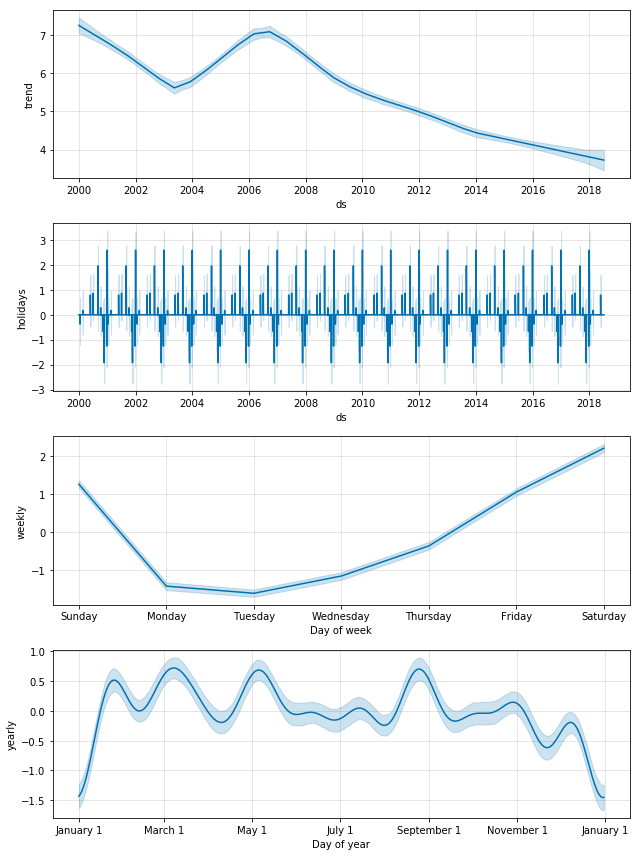

In [270]:
m_housed_bpd = Prophet(holidays=df_holidays, mcmc_samples=500)
m_housed_bpd.fit(df_housed_bpd)

future_housed_bpd = m_housed_bpd.make_future_dataframe(periods=365)
forecast_housed_bpd = m_housed_bpd.predict(future_housed_bpd)
m_housed_bpd.plot_components(forecast_housed_bpd)

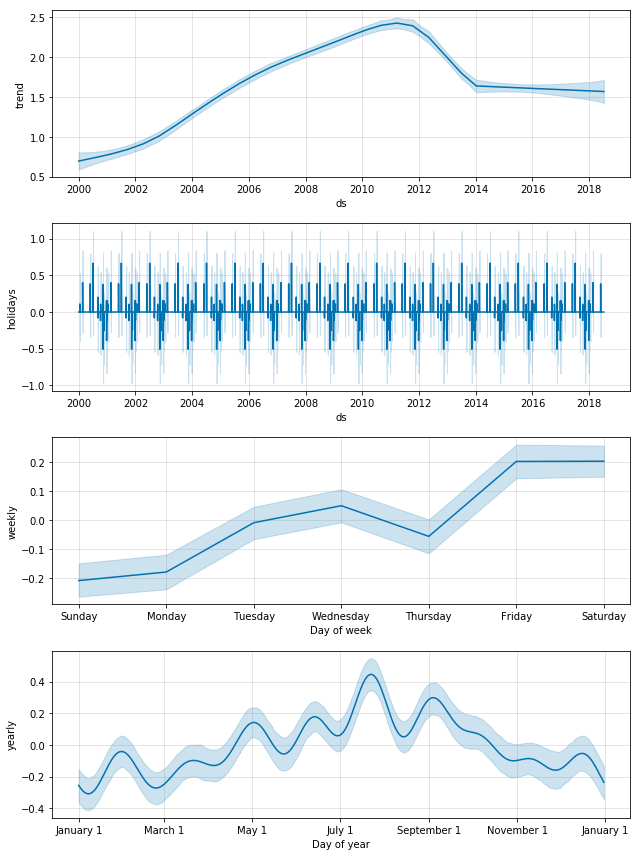

In [271]:
m_unhoused_bpd = Prophet(holidays=df_holidays, mcmc_samples=500)
m_unhoused_bpd.fit(df_unhoused_bpd)

future_unhoused_bpd = m_unhoused_bpd.make_future_dataframe(periods=365)
forecast_unhoused_bpd = m_unhoused_bpd.predict(future_unhoused_bpd)
m_unhoused_bpd.plot_components(forecast_unhoused_bpd)

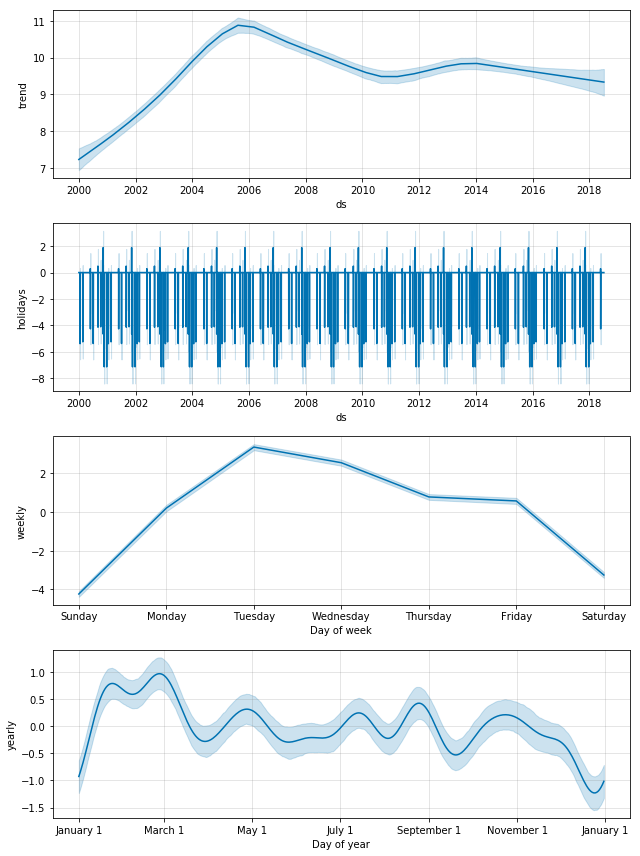

In [272]:
m_housed_bcso = Prophet(holidays=df_holidays, mcmc_samples=500)
m_housed_bcso.fit(df_housed_bcso)

future_housed_bcso = m_housed_bcso.make_future_dataframe(periods=365)
forecast_housed_bcso = m_housed_bcso.predict(future_housed_bcso)
m_housed_bcso.plot_components(forecast_housed_bcso)


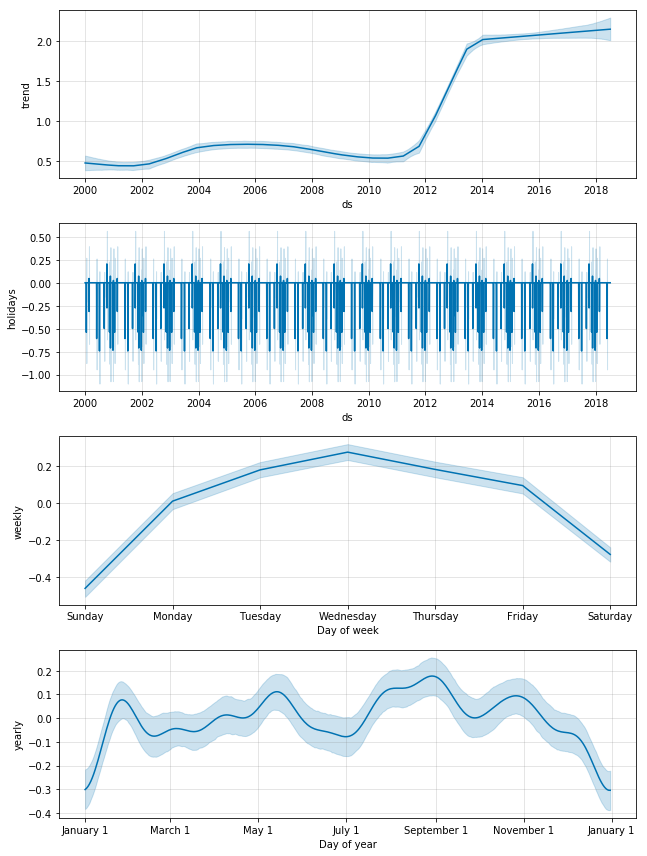

In [273]:
m_unhoused_bcso = Prophet(holidays=df_holidays, mcmc_samples=500)
m_unhoused_bcso.fit(df_unhoused_bcso)

future_unhoused_bcso = m_unhoused_bcso.make_future_dataframe(periods=365)
forecast_unhoused_bcso = m_unhoused_bcso.predict(future_unhoused_bcso)
m_unhoused_bcso.plot_components(forecast_unhoused_bcso)

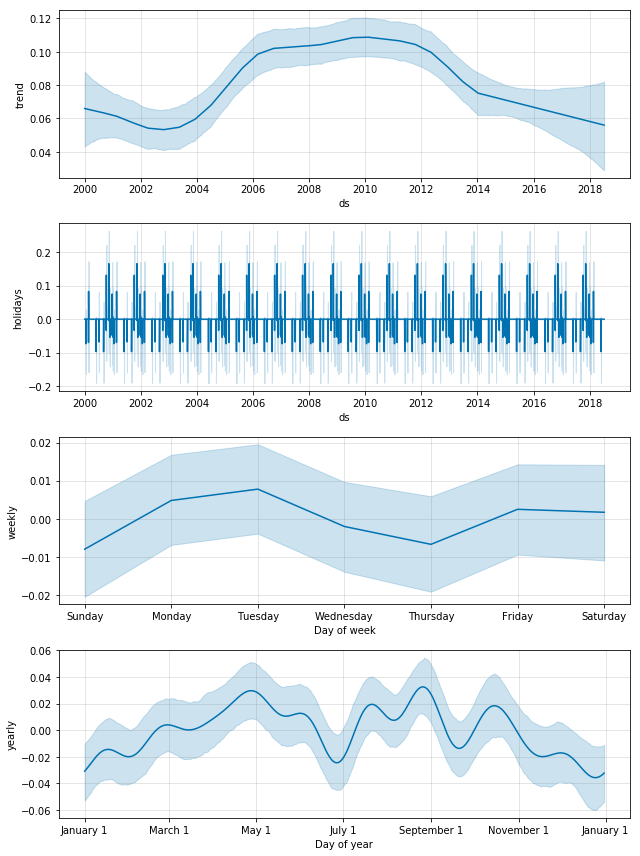

In [274]:
m_unhoused_cupd = Prophet(holidays=df_holidays, mcmc_samples=500)
m_unhoused_cupd.fit(df_unhoused_cupd)

future_unhoused_cupd = m_unhoused_cupd.make_future_dataframe(periods=365)
forecast_unhoused_cupd = m_unhoused_cupd.predict(future_unhoused_cupd)
m_unhoused_cupd.plot_components(forecast_unhoused_cupd)

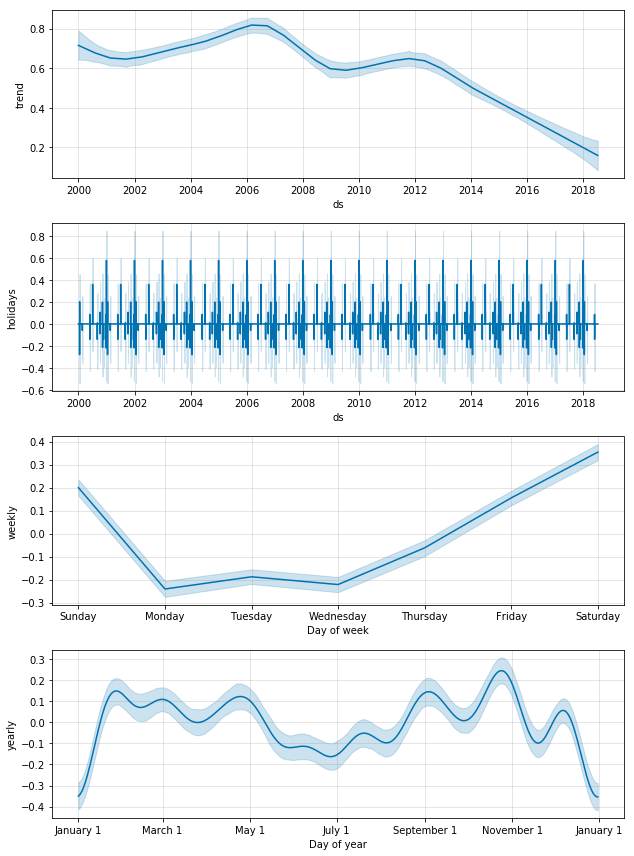

In [275]:
m_housed_cupd = Prophet(holidays=df_holidays, mcmc_samples=500)
m_housed_cupd.fit(df_housed_cupd)

future_housed_cupd = m_housed_cupd.make_future_dataframe(periods=365)
forecast_housed_cupd = m_housed_cupd.predict(future_housed_cupd)
m_housed_cupd.plot_components(forecast_housed_cupd)

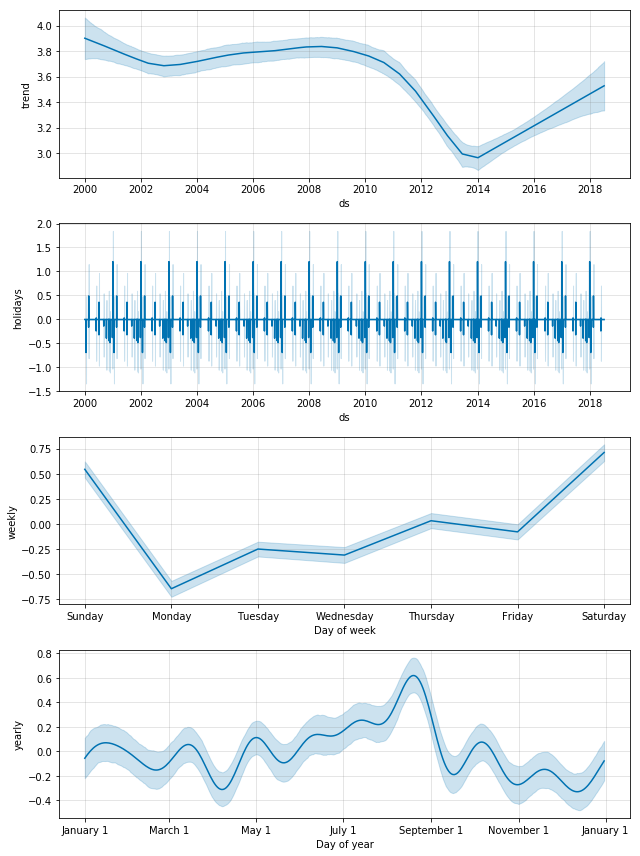

In [276]:
m_housed_longmont = Prophet(holidays=df_holidays, mcmc_samples=500)
m_housed_longmont.fit(df_housed_longmont)

future_housed_longmont = m_housed_longmont.make_future_dataframe(periods=365)
forecast_housed_longmont = m_housed_longmont.predict(future_housed_longmont)
m_housed_longmont.plot_components(forecast_housed_longmont)

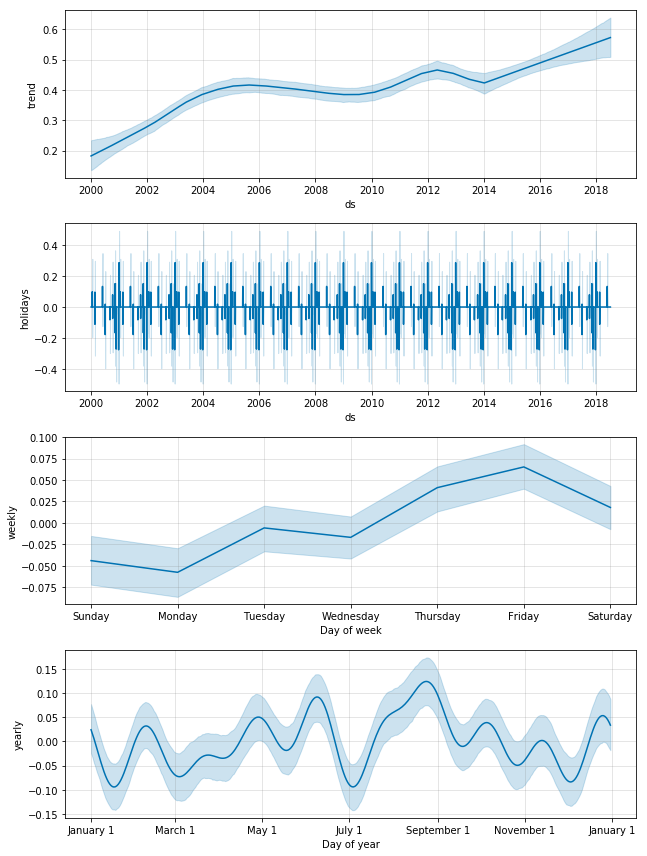

In [277]:
m_unhoused_longmont = Prophet(holidays=df_holidays, mcmc_samples=500)
m_unhoused_longmont.fit(df_unhoused_longmont)

future_unhoused_longmont = m_unhoused_longmont.make_future_dataframe(periods=365)
forecast_unhoused_longmont = m_unhoused_longmont.predict(future_unhoused_longmont)
m_unhoused_longmont.plot_components(forecast_unhoused_longmont)

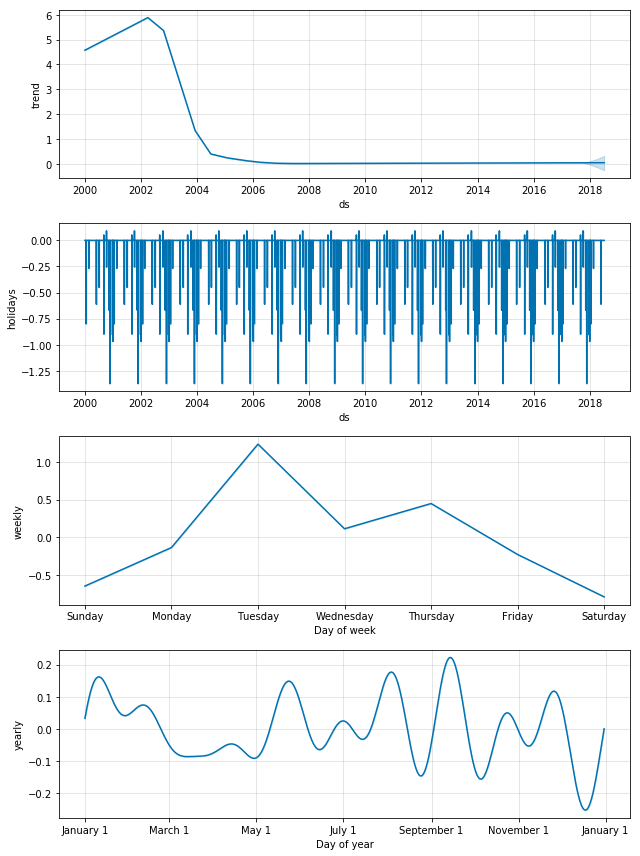

In [309]:
m_housed_jm = Prophet(holidays=df_holidays)
m_housed_jm.fit(df_housed_jm)

future_housed_jm = m_housed_jm.make_future_dataframe(periods=365)
forecast_housed_jm = m_housed_jm.predict(future_housed_jm)
m_housed_jm.plot_components(forecast_housed_jm)

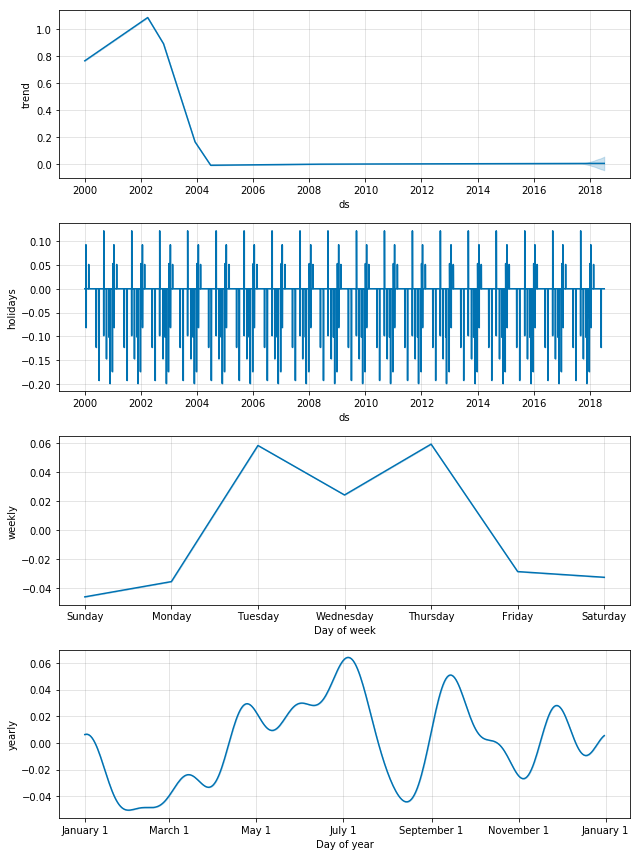

In [308]:
m_unhoused_jm = Prophet(holidays=df_holidays)
m_unhoused_jm.fit(df_unhoused_jm)

future_unhoused_jm = m_unhoused_jm.make_future_dataframe(periods=365)
forecast_unhoused_jm = m_unhoused_jm.predict(future_unhoused_jm)
m_unhoused_jm.plot_components(forecast_unhoused_jm)

In [ ]:
m_housed_bcso.pl

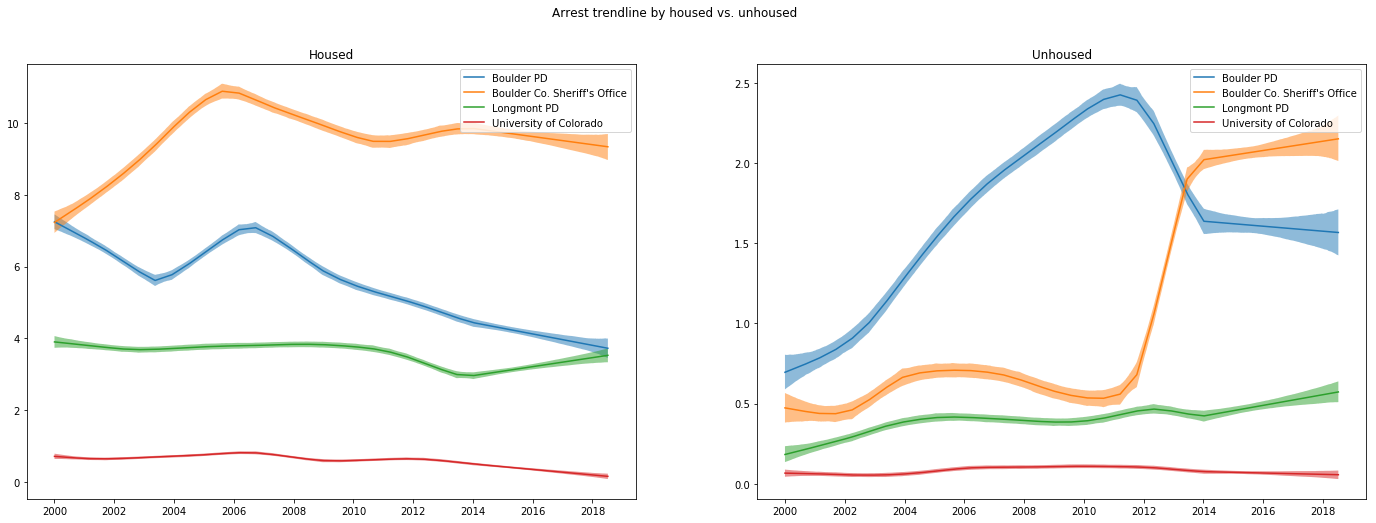

In [316]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
axes[0].plot(forecast_housed_bpd.ds, forecast_housed_bpd.trend, label="Boulder PD")
axes[0].plot(forecast_housed_bcso.ds, forecast_housed_bcso.trend, label="Boulder Co. Sheriff's Office")
axes[0].plot(forecast_housed_longmont.ds, forecast_housed_longmont.trend, label="Longmont PD")
axes[0].plot(forecast_housed_cupd.ds, forecast_housed_cupd.trend, label="University of Colorado")
axes[0].legend(loc="upper right")

axes[0].fill_between(forecast_housed_bpd.ds.values, forecast_housed_bpd.trend_lower, forecast_housed_bpd.trend_upper, label="Boulder PD", alpha=0.5)
axes[0].fill_between(forecast_housed_bcso.ds.values, forecast_housed_bcso.trend_lower, forecast_housed_bcso.trend_upper, label="Boulder Co. Sheriff's Office", alpha=0.5)
axes[0].fill_between(forecast_housed_longmont.ds.values, forecast_housed_longmont.trend_lower, forecast_housed_longmont.trend_upper, label="Longmont PD", alpha=0.5)
axes[0].fill_between(forecast_housed_cupd.ds.values, forecast_housed_cupd.trend_lower, forecast_housed_cupd.trend_upper, label="University of Colorado", alpha=0.5)

axes[0].set_title("Housed")

axes[1].plot(forecast_unhoused_bpd.ds, forecast_unhoused_bpd.trend, label="Boulder PD")
axes[1].plot(forecast_unhoused_bcso.ds, forecast_unhoused_bcso.trend, label="Boulder Co. Sheriff's Office")
axes[1].plot(forecast_unhoused_longmont.ds, forecast_unhoused_longmont.trend, label="Longmont PD")
axes[1].plot(forecast_unhoused_cupd.ds, forecast_unhoused_cupd.trend, label="University of Colorado")
axes[1].legend(loc="upper right")

axes[1].fill_between(forecast_unhoused_bpd.ds.values, forecast_unhoused_bpd.trend_lower, forecast_unhoused_bpd.trend_upper, label="Boulder PD", alpha=0.5)
axes[1].fill_between(forecast_unhoused_bcso.ds.values, forecast_unhoused_bcso.trend_lower, forecast_unhoused_bcso.trend_upper, label="Boulder Co. Sheriff's Office", alpha=0.5)
axes[1].fill_between(forecast_unhoused_longmont.ds.values, forecast_unhoused_longmont.trend_lower, forecast_unhoused_longmont.trend_upper, label="Longmont PD", alpha=0.5)
axes[1].fill_between(forecast_unhoused_cupd.ds.values, forecast_unhoused_cupd.trend_lower, forecast_unhoused_cupd.trend_upper, label="University of Colorado", alpha=0.5)

axes[1].set_title("Unhoused")

plt.suptitle("Arrest trendline by housed vs. unhoused")
plt.show()

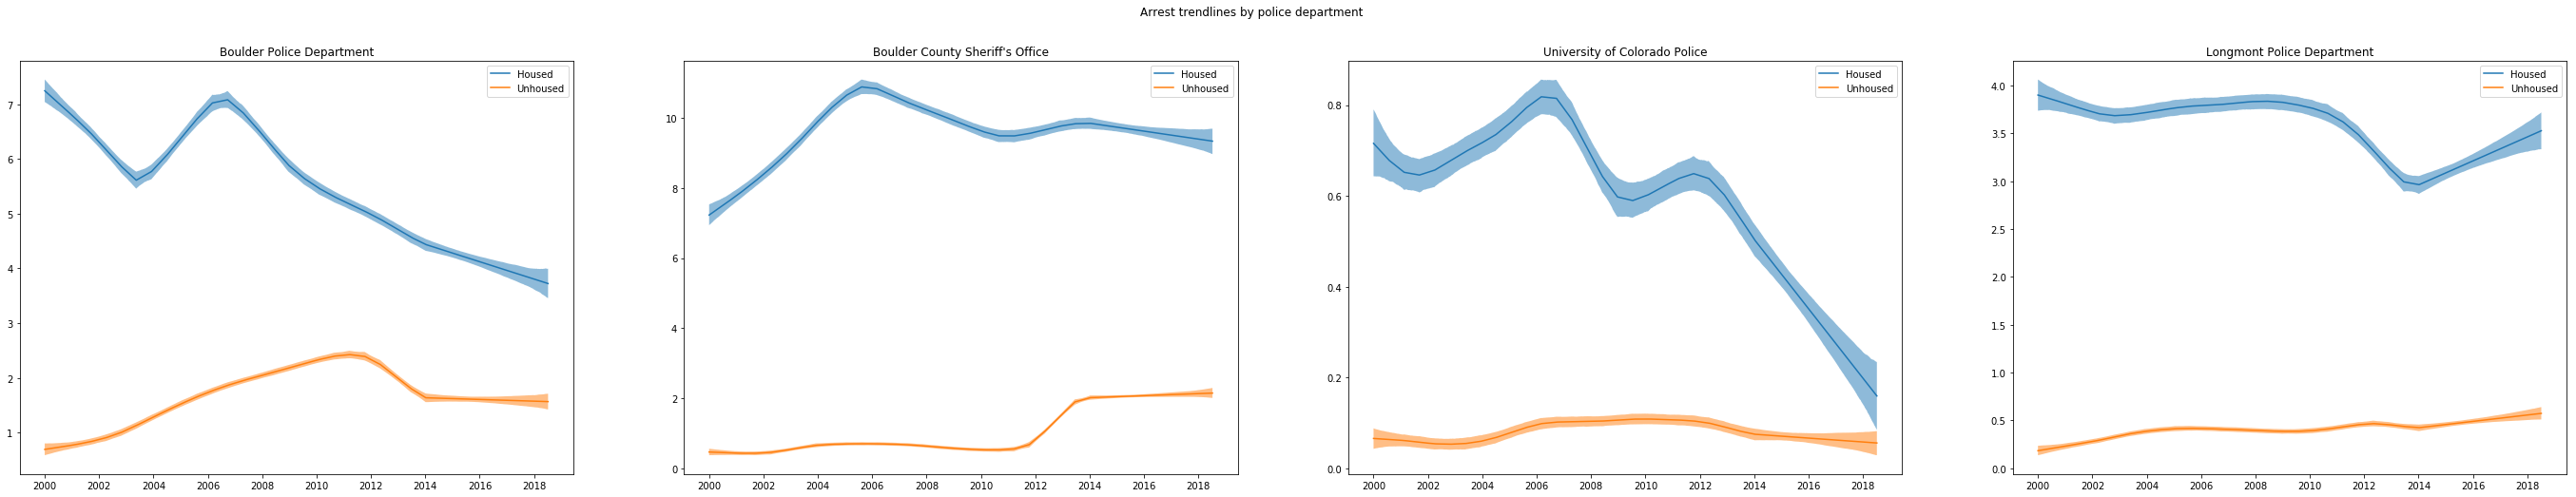

In [296]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(48, 8))
axes[0].plot(forecast_housed_bpd.ds, forecast_housed_bpd.trend, label="Housed")
axes[0].plot(forecast_unhoused_bpd.ds, forecast_unhoused_bpd.trend, label="Unhoused")
axes[0].fill_between(forecast_housed_bpd.ds.values, forecast_housed_bpd.trend_lower, forecast_housed_bpd.trend_upper, alpha=0.5)
axes[0].fill_between(forecast_unhoused_bpd.ds.values, forecast_unhoused_bpd.trend_lower, forecast_unhoused_bpd.trend_upper, alpha=0.5)
axes[0].legend(loc="best")
axes[0].set_title("Boulder Police Department")

axes[1].plot(forecast_housed_bcso.ds, forecast_housed_bcso.trend, label="Housed")
axes[1].plot(forecast_unhoused_bcso.ds, forecast_unhoused_bcso.trend, label="Unhoused")
axes[1].fill_between(forecast_housed_bcso.ds.values, forecast_housed_bcso.trend_lower, forecast_housed_bcso.trend_upper, alpha=0.5)
axes[1].fill_between(forecast_unhoused_bcso.ds.values, forecast_unhoused_bcso.trend_lower, forecast_unhoused_bcso.trend_upper, alpha=0.5)
axes[1].legend(loc="best")
axes[1].set_title("Boulder County Sheriff's Office")

axes[2].plot(forecast_housed_cupd.ds, forecast_housed_cupd.trend, label="Housed")
axes[2].plot(forecast_unhoused_cupd.ds, forecast_unhoused_cupd.trend, label="Unhoused")
axes[2].fill_between(forecast_housed_cupd.ds.values, forecast_housed_cupd.trend_lower, forecast_housed_cupd.trend_upper, alpha=0.5)
axes[2].fill_between(forecast_unhoused_cupd.ds.values, forecast_unhoused_cupd.trend_lower, forecast_unhoused_cupd.trend_upper, alpha=0.5)
axes[2].legend(loc="best")
axes[2].set_title("University of Colorado Police")

axes[3].plot(forecast_housed_longmont.ds, forecast_housed_longmont.trend, label="Housed")
axes[3].plot(forecast_unhoused_longmont.ds, forecast_unhoused_longmont.trend, label="Unhoused")
axes[3].fill_between(forecast_housed_longmont.ds.values, forecast_housed_longmont.trend_lower, forecast_housed_longmont.trend_upper, alpha=0.5)
axes[3].fill_between(forecast_unhoused_longmont.ds.values, forecast_unhoused_longmont.trend_lower, forecast_unhoused_longmont.trend_upper, alpha=0.5)
axes[3].legend(loc="best")
axes[3].set_title("Longmont Police Department")

plt.suptitle("Arrest trendlines by police department")
plt.show()

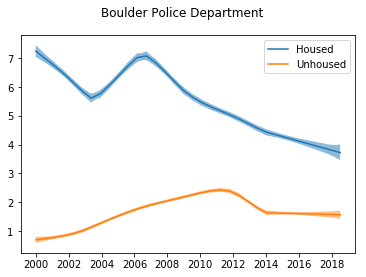

In [301]:
plt.plot(forecast_housed_bpd.ds, forecast_housed_bpd.trend, label="Housed")
plt.plot(forecast_unhoused_bpd.ds, forecast_unhoused_bpd.trend, label="Unhoused")
plt.fill_between(forecast_housed_bpd.ds.values, forecast_housed_bpd.trend_lower, forecast_housed_bpd.trend_upper, alpha=0.5)
plt.fill_between(forecast_unhoused_bpd.ds.values, forecast_unhoused_bpd.trend_lower, forecast_unhoused_bpd.trend_upper, alpha=0.5)
plt.legend(loc="best")
plt.suptitle("Boulder Police Department")

plt.show()

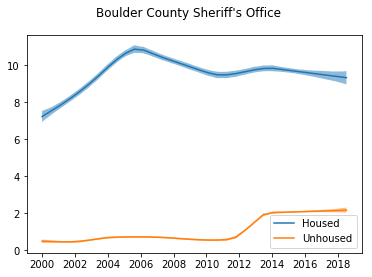

In [304]:
plt.plot(forecast_housed_bcso.ds, forecast_housed_bcso.trend, label="Housed")
plt.plot(forecast_unhoused_bcso.ds, forecast_unhoused_bcso.trend, label="Unhoused")
plt.fill_between(forecast_housed_bcso.ds.values, forecast_housed_bcso.trend_lower, forecast_housed_bcso.trend_upper, alpha=0.5)
plt.fill_between(forecast_unhoused_bcso.ds.values, forecast_unhoused_bcso.trend_lower, forecast_unhoused_bcso.trend_upper, alpha=0.5)
plt.legend(loc="best")
plt.suptitle("Boulder County Sheriff's Office")

plt.show()

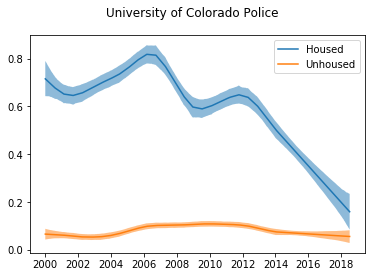

In [305]:
plt.plot(forecast_housed_cupd.ds, forecast_housed_cupd.trend, label="Housed")
plt.plot(forecast_unhoused_cupd.ds, forecast_unhoused_cupd.trend, label="Unhoused")
plt.fill_between(forecast_housed_cupd.ds.values, forecast_housed_cupd.trend_lower, forecast_housed_cupd.trend_upper, alpha=0.5)
plt.fill_between(forecast_unhoused_cupd.ds.values, forecast_unhoused_cupd.trend_lower, forecast_unhoused_cupd.trend_upper, alpha=0.5)
plt.legend(loc="best")
plt.suptitle("University of Colorado Police")
plt.show()

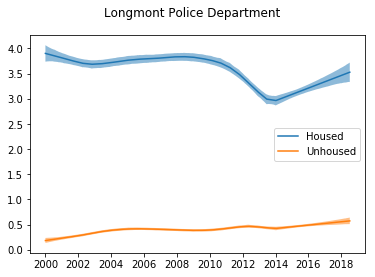

In [306]:
plt.plot(forecast_housed_longmont.ds, forecast_housed_longmont.trend, label="Housed")
plt.plot(forecast_unhoused_longmont.ds, forecast_unhoused_longmont.trend, label="Unhoused")
plt.fill_between(forecast_housed_longmont.ds.values, forecast_housed_longmont.trend_lower, forecast_housed_longmont.trend_upper, alpha=0.5)
plt.fill_between(forecast_unhoused_longmont.ds.values, forecast_unhoused_longmont.trend_lower, forecast_unhoused_longmont.trend_upper, alpha=0.5)
plt.legend(loc="best")
plt.suptitle("Longmont Police Department")

plt.show()

General models

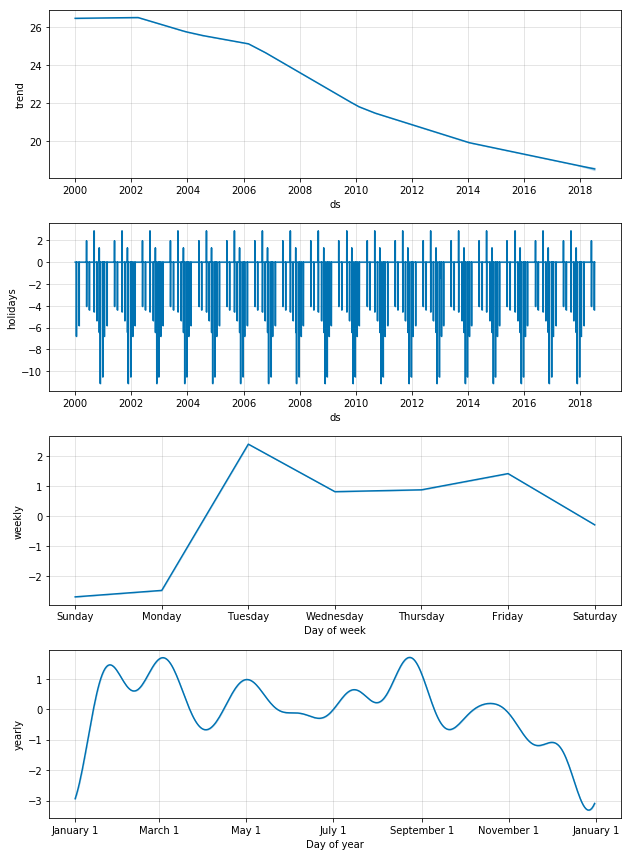

In [146]:
m_housed = Prophet(holidays=df_holidays)
m_housed.fit(df_housed)

future_housed = m_housed.make_future_dataframe(periods=365)
forecast_housed = m_housed.predict(future_housed)
m_housed.plot_components(forecast_housed)

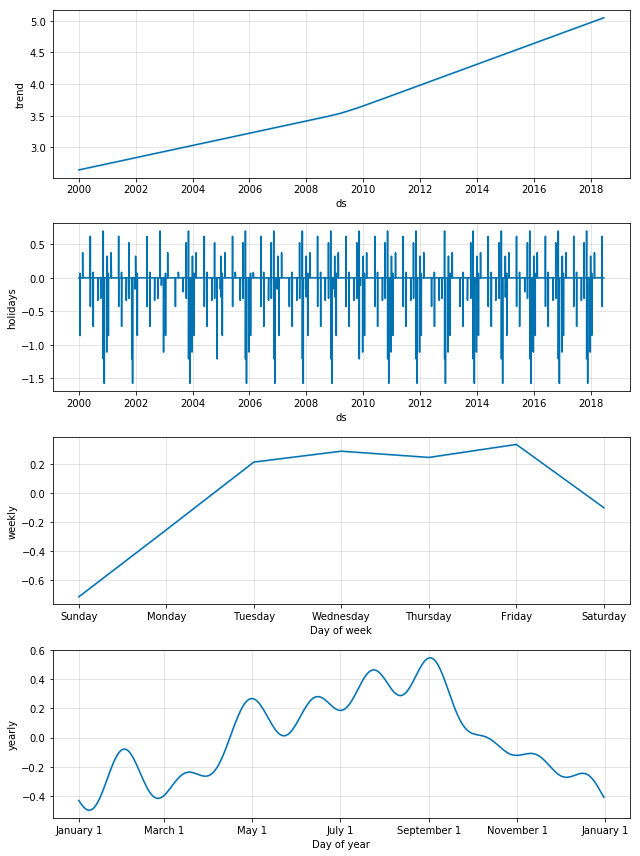

In [147]:
m_unhoused = Prophet(holidays=df_holidays)
m_unhoused.fit(df_unhoused)

future_unhoused = m_unhoused.make_future_dataframe(periods=365)
forecast_unhoused = m_unhoused.predict(future_unhoused)
m_unhoused.plot_components(forecast_unhoused)

In [20]:
import matplotlib.pyplot as plt

In [132]:
forecast_unhoused.head(3)

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,Christmas,Christmas_lower,Christmas_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Dr. Martin Luther King Jr.,Dr. Martin Luther King Jr._lower,Dr. Martin Luther King Jr._upper,July 4th,July 4th_lower,July 4th_upper,Labor Day,Labor Day_lower,Labor Day_upper,MemorialDay,MemorialDay_lower,MemorialDay_upper,New Years Day,New Years Day_lower,New Years Day_upper,Presidents Day,Presidents Day_lower,Presidents Day_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2000-01-02,0.000000,2.646279,-1.152822,-1.152822,2.646279,2.646279,-0.961104,3.918262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.717441,-0.717441,-0.717441,-0.435381,-0.435381,-0.435381,-1.152822,1.493457
1,2000-01-03,0.000157,2.646543,-0.705763,-0.705763,2.646543,2.646543,-0.351706,4.577308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.255102,-0.255102,-0.255102,-0.450660,-0.450660,-0.450660,-0.705763,1.940780
2,2000-01-04,0.000314,2.646807,-0.252593,-0.252593,2.646807,2.646807,-0.117934,5.001005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211784,0.211784,0.211784,-0.464377,-0.464377,-0.464377,-0.252593,2.394214


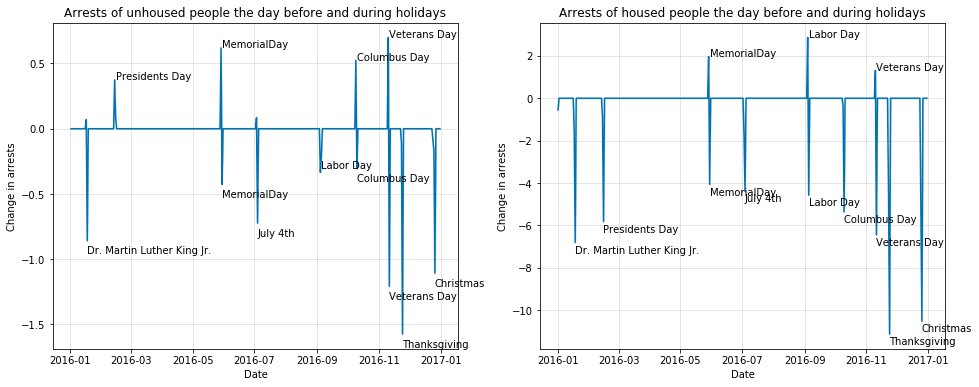

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

m_unhoused.plot_holidays(forecast_unhoused[forecast_unhoused.ds.apply(lambda x: x.year == 2016)], ax=axes[0])
axes[0].set_title("Arrests of unhoused people the day before and during holidays")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Change in arrests")

m_housed.plot_holidays(forecast_housed[forecast_housed.ds.apply(lambda x: x.year == 2016)], ax=axes[1])
axes[1].set_title("Arrests of housed people the day before and during holidays")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Change in arrests")

holidays_2016 = holidays[holidays.index.year == 2016].iloc[1:] # skip new years
for ix, holiday in zip(holidays_2016.index, holidays_2016.values):
    y_unh = forecast_unhoused[forecast_unhoused.ds.apply(lambda x: x == ix)][holiday]
    y_h = forecast_housed[forecast_housed.ds.apply(lambda x: x == ix)][holiday]
    
    y_unh_before = forecast_unhoused[forecast_unhoused.ds.apply(lambda x: x == ix - datetime.timedelta(days=1))]["{}_lower".format(holiday)]
    y_h_before = forecast_housed[forecast_housed.ds.apply(lambda x: x == ix - datetime.timedelta(days=1))]["{}_lower".format(holiday)]
    
    if len(y_unh == 1) and y_unh.iloc[0] < -0.01:
        axes[0].text(ix, y_unh.iloc[0] - 0.1, holiday)
        
    if len(y_h == 1) and y_h.iloc[0] < -0.01:
        axes[1].text(ix, y_h.iloc[0] - 0.5, holiday)
        
    if len(y_unh_before == 1) and y_unh_before.iloc[0] > 0.1:
        axes[0].text(ix, y_unh_before.iloc[0], holiday)
    
    if len(y_h_before == 1) and y_h_before.iloc[0] > 0.01:
        axes[1].text(ix, y_h_before.iloc[0], holiday)

plt.show()

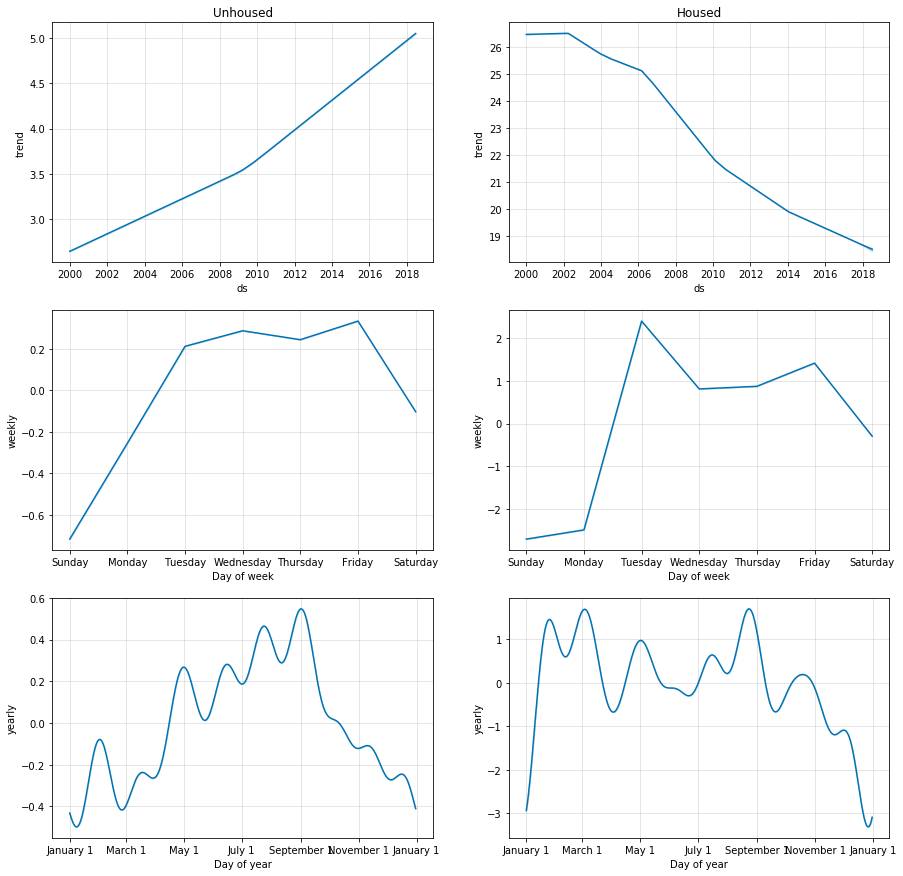

In [94]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
m_unhoused.plot_trend(forecast_unhoused, ax=axs[0][0])
m_housed.plot_trend(forecast_housed, ax=axs[0][1])

axs[0][0].set_title("Unhoused")
axs[0][1].set_title("Housed")

m_unhoused.plot_weekly(ax=axs[1][0])
m_housed.plot_weekly(ax=axs[1][1])

m_unhoused.plot_yearly(ax=axs[2][0])
m_housed.plot_yearly(ax=axs[2][1])

plt.show()

In [72]:
forecast_housed.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,holiday,holiday_lower,holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
6759,2018-07-04,1.056424,18.515534,-5.033288,-5.033288,18.469616,18.572676,6.068283,20.092872,-5.966694,-5.966694,-5.966694,0.737492,0.737492,0.737492,0.195914,0.195914,0.195914,-5.033288,13.482246
6760,2018-07-05,1.056580,18.514679,1.037362,1.037362,18.468669,18.571989,12.451084,26.446977,0.000000,0.000000,0.000000,0.767097,0.767097,0.767097,0.270265,0.270265,0.270265,1.037362,19.552041
6761,2018-07-06,1.056736,18.513824,1.765991,1.765991,18.467723,18.571303,13.242657,27.390723,0.000000,0.000000,0.000000,1.422517,1.422517,1.422517,0.343474,0.343474,0.343474,1.765991,20.279815
6762,2018-07-07,1.056893,18.512969,0.115728,0.115728,18.466688,18.570616,11.141830,25.351417,0.000000,0.000000,0.000000,-0.298328,-0.298328,-0.298328,0.414056,0.414056,0.414056,0.115728,18.628697
6763,2018-07-08,1.057049,18.512115,-2.112457,-2.112457,18.465454,18.569929,9.682268,23.260729,0.000000,0.000000,0.000000,-2.593017,-2.593017,-2.593017,0.480560,0.480560,0.480560,-2.112457,16.399658


In [73]:
forecast_unhoused.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,holiday,holiday_lower,holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
6388,2018-06-15,1.056601,5.046013,0.612934,0.612934,5.043298,5.048709,3.090866,8.193207,0.0,0.0,0.0,0.328898,0.328898,0.328898,0.284037,0.284037,0.284037,0.612934,5.658947
6389,2018-06-16,1.056758,5.046463,0.178750,0.178750,5.043738,5.049169,2.772983,7.791982,0.0,0.0,0.0,-0.103364,-0.103364,-0.103364,0.282114,0.282114,0.282114,0.178750,5.225213
6390,2018-06-17,1.056914,5.046914,-0.436089,-0.436089,5.044152,5.049628,2.111097,7.013754,0.0,0.0,0.0,-0.714330,-0.714330,-0.714330,0.278241,0.278241,0.278241,-0.436089,4.610826
6391,2018-06-18,1.057071,5.047365,0.042815,0.042815,5.044586,5.050088,2.582168,7.595079,0.0,0.0,0.0,-0.229782,-0.229782,-0.229782,0.272597,0.272597,0.272597,0.042815,5.090180
6392,2018-06-19,1.057228,5.047816,0.475719,0.475719,5.045028,5.050555,3.117143,8.032726,0.0,0.0,0.0,0.210317,0.210317,0.210317,0.265402,0.265402,0.265402,0.475719,5.523535


Populating the interactive namespace from numpy and matplotlib


/Users/sam/workspace/d4d/jail/venv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


            Booked         day
2000-01-01      44  2000-01-01
2000-01-02      20  2000-01-02
2000-01-03      35  2000-01-03
2000-01-04      31  2000-01-04
2000-01-05      35  2000-01-05
            Booked  Holiday  Monday  Tuesday  Wednesday  Thursday  Friday  \
2000-01-01      44        0       0        0          0         0       0   
2000-01-02      20        0       0        0          0         0       0   
2000-01-03      35        0       1        0          0         0       0   
2000-01-04      31        0       0        1          0         0       0   
2000-01-05      35        0       0        0          1         0       0   

            Saturday  Sunday  
2000-01-01         1       0  
2000-01-02         0       1  
2000-01-03         0       0  
2000-01-04         0       0  
2000-01-05         0       0  


/Users/sam/workspace/d4d/jail/venv/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 32.723:  89%|████████▉ | 178486/200000 [00:28<00:02, 7241.40it/s]
Convergence archived at 178800
Interrupted at 178,800 [89%]: Average Loss = 46.764
100%|██████████| 1500/1500 [03:24<00:00,  5.80it/s]/Users/sam/workspace/d4d/jail/venv/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:448: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)
/Users/sam/workspace/d4d/jail/venv/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 135 diverging samples 

         Current function value: 81.940123
         Iterations: 58
         Function evaluations: 99
         Gradient evaluations: 87
{'Intercept': array(12.50716741281991), 'Monday': array(12.492832587177958), 'Tuesday': array(0.0), 'Wednesday': array(0.0), 'Thursday': array(0.0), 'Friday': array(0.0), 'Saturday': array(0.0), 'Sunday': array(0.0), 'Holiday': array(0.0), 'Saturday:Holiday': array(0.0), 'Sunday:Holiday': array(0.0), 'sd_log__': array(-15.259254378227103)}

Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  104.590          1091.449         73.892           [-1993.229, 2100.821]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1929.150      -560.273       79.851         822.894        2194.977


Monday:

  Mean             SD               MC Error        

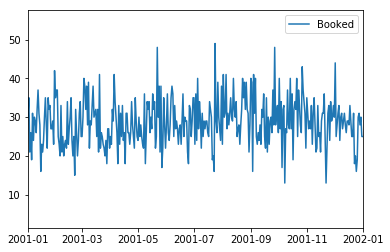

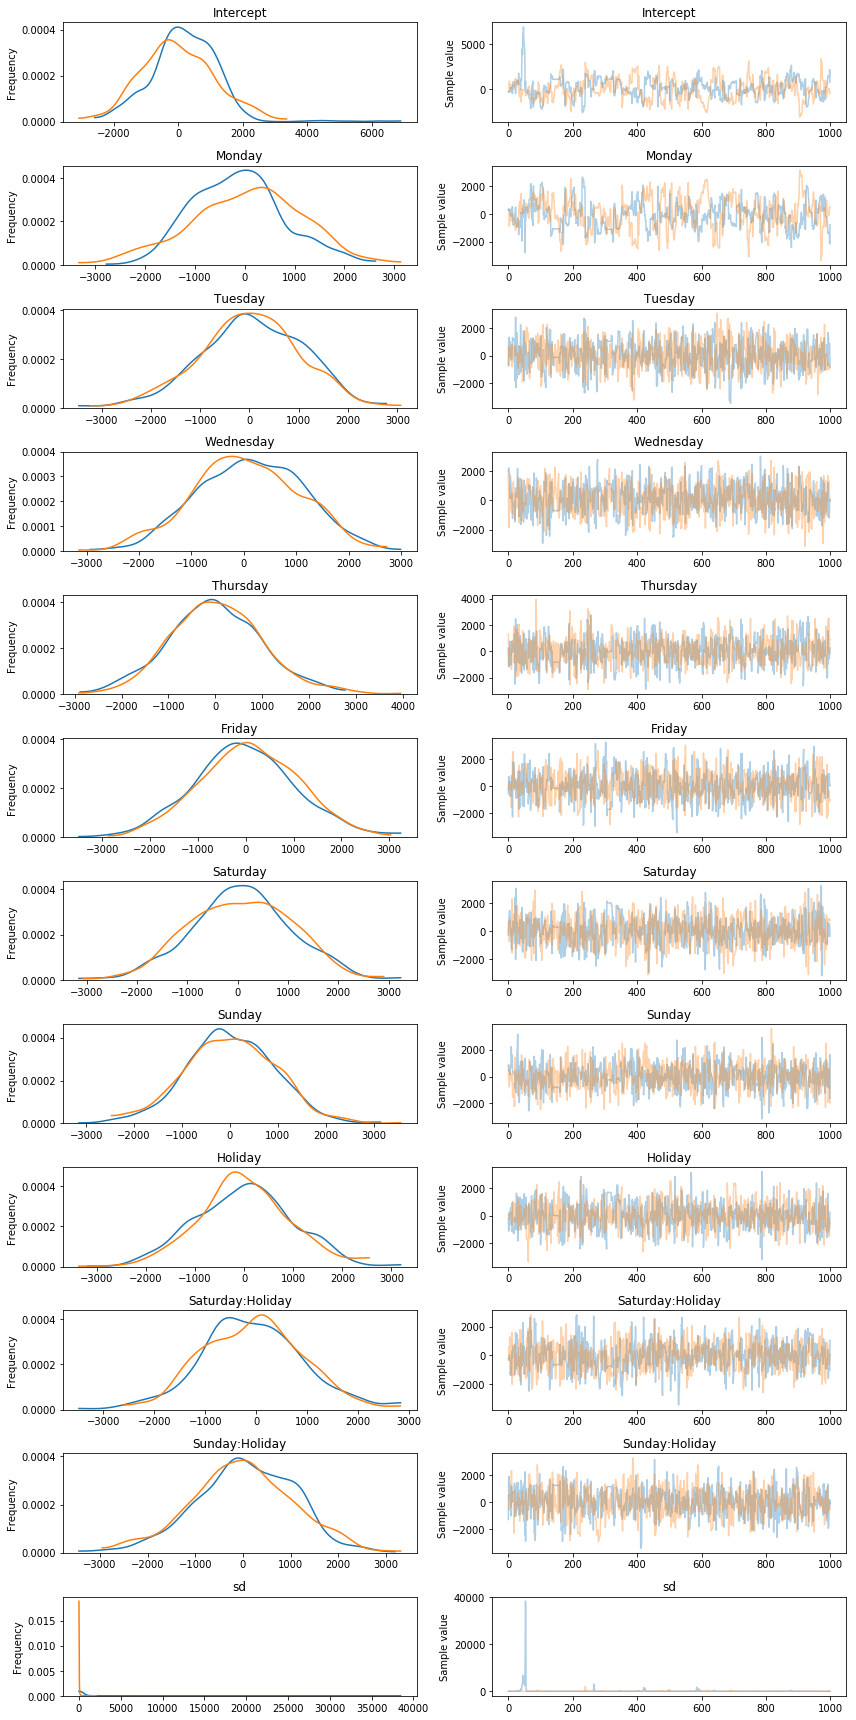

In [1]:
import pymc3 as pm
import patsy
from datetime import datetime
%pylab inline

#data['Booked']=data['Booked'].astype(datetime)
counts=pd.DataFrame(data.groupby(data.index.date).count()['Booked'])
counts.plot(xlim=('2001-01-01','2002-01-01'))
counts[0:10]

counts['day'] = counts.index
print(counts.head())
#this creates dummy variables for holidays and the day of the week
#we will always include these variables in the dataframe, no matter 
#what additional data we wish to analyze to help control for potential seasonality
counts['hday']=counts['day'].apply(lambda x: int(x in holidays))
counts['day']=counts['day'].apply(lambda x: x.weekday())
counts=pd.merge(counts,pd.get_dummies(counts['day']),left_index=True,right_index=True,how='left')
del counts['day']

counts.columns=['Booked','Holiday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
print(counts.head())
counts=counts.ix[2*365,:]
#add two interacta
with pm.Model() as model:
    pm.glm.GLM.from_formula('Booked ~ Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday+Holiday+Saturday:Holiday+Sunday:Holiday', counts)
    trace = pm.sample(1000, njobs=2)


plt.figure(figsize=(7, 7))
pm.traceplot(trace);
plt.tight_layout();

map_estimate = pm.find_MAP(model=model)

print(map_estimate)
print(pm.summary(trace))

In [ ]:
import pandas as pd


In [ ]:
m_housed = Prophet(mcmc_samples=500)
m_housed.fit(df_housed);
future_housed = m_housed.make_future_dataframe(periods=365)
forecast_housed = m_housed.predict(future_housed)
m_housed.plot_components(forecast_housed)

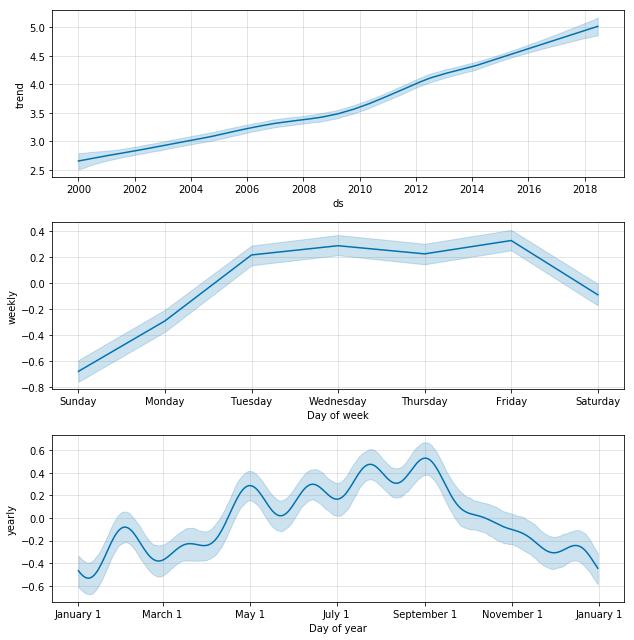

In [13]:
m_unhoused = Prophet(mcmc_samples=500)
m_unhoused.fit(df_unhoused);
future = m_unhoused.make_future_dataframe(periods=365)
future.tail()
forecast = m_unhoused.predict(future)
m_unhoused.plot_components(forecast);